In [1]:
%load_ext autoreload
%autoreload 2

### Load Example Series

In [5]:
from functions import Tarloader

# Make Dataloader
tl = Tarloader('./data/hc-11/data/')
# Show available files
print(tl.files)
# Extract Buddy
novel, data = tl[1]

['Achilles_10252013', 'Achilles_11012013', 'Buddy_06272013', 'Cicero_09012014', 'Cicero_09102014', 'Cicero_09172014', 'Gatsby_08022013', 'Gatsby_08282013']


### Plot Series

<Axes: xlabel='time', ylabel='wf0'>

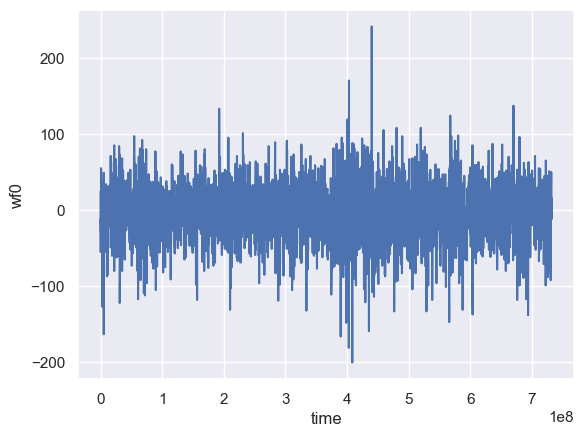

In [20]:
import seaborn as sns
sns.set_theme()

# Plot subsampled series
# sns.lineplot(data=data.iloc[::10000], x='time', y='feature0')
sns.lineplot(data=data.iloc[::10000], x='time', y='wf0')